In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt


dataset_folder = '/Users/anmol_gorakshakar/python/machine_learning/mri_images'
if os.path.exists(dataset_folder):
    folders = ['Testing', 'Training']
    test_holder = []
    training_holder = []
    for f in folders:
        labels = os.listdir(f"{dataset_folder}/{f}")
        for l in labels:
            try: 
                path = [f"{dataset_folder}/{f}/{l}/{i}" for i in os.listdir(f"{dataset_folder}/{f}/{l}")]
                path = pd.DataFrame(path, columns=['path'])
                path['label'] = str(l)
                if f == 'Testing':
                    test_holder.append(path)
                else:
                    training_holder.append(path)
            except Exception as e:
                print(e)
    test_holder, training_holder = [*map(pd.concat, [test_holder, training_holder])]
        

[Errno 20] Not a directory: '/Users/anmol_gorakshakar/python/machine_learning/mri_images/Testing/.DS_Store'
[Errno 20] Not a directory: '/Users/anmol_gorakshakar/python/machine_learning/mri_images/Training/.DS_Store'


In [2]:
training_holder = training_holder.reset_index(drop=True)
test_holder = test_holder.reset_index(drop=True)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_val = train_test_split(training_holder, 
                                  test_size = 0.2, 
                                  stratify=training_holder.label, 
                                  random_state=12)

In [4]:
from matplotlib import image
import matplotlib.pyplot as plt
from PIL import Image

In [5]:
test_holder_one_hot = pd.get_dummies(test_holder.label).to_numpy()
training_holder_one_hot = pd.get_dummies(training_holder.label).to_numpy()

In [7]:
def preprocess_image(path, resize=(250,250)):
    img = Image.open(path)
    img = img.resize(resize, Image.ANTIALIAS)
    return np.asarray(img)

In [8]:
X_train = np.array([*map(preprocess_image, training_holder.path)])
X_label = training_holder_one_hot

In [9]:
X_test = np.array([*map(preprocess_image, test_holder.path)])
X_test_label = test_holder_one_hot

/Users/anmol_gorakshakar/python/anaconda3/envs/scratch/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


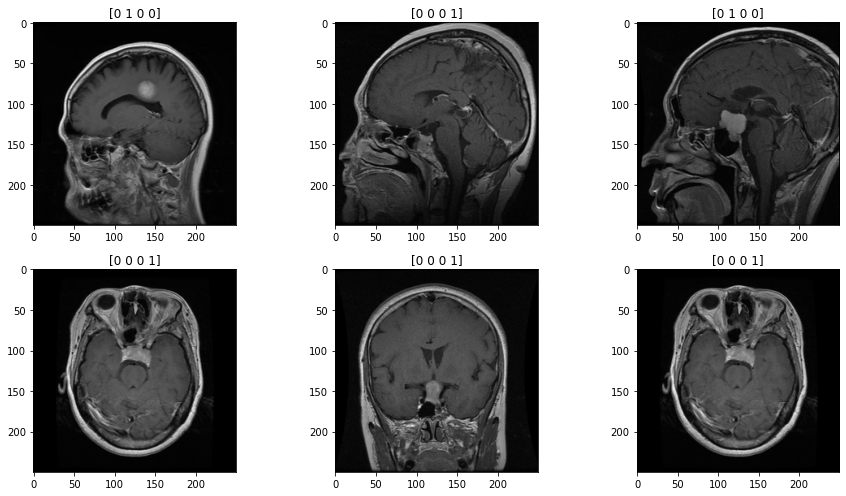

In [10]:
from random import choice
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(13,7))

for i, a in enumerate(ax.flat):
    random_number = choice(range(X_train.shape[0]))
    img, label = X_train[random_number], training_holder_one_hot[random_number]
    a.imshow(img)
    a.set_title(label)

plt.tight_layout()
plt.show()

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPooling2D, Flatten, Activation

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=(250, 250, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.2))

model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [12]:
import tensorflow as tf
cb = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

In [13]:
hst = model.fit(tf.cast(X_train, tf.float32), 
                training_holder_one_hot,
                validation_split=0.1, 
                epochs =10, verbose=1, 
                batch_size=32, callbacks=cb)

Epoch 1/10
81/81 [==============================] - 96s 1s/step - loss: 140.3085 - accuracy: 0.4765 - val_loss: 0.2230 - val_accuracy: 0.9408
Epoch 2/10
81/81 [==============================] - 94s 1s/step - loss: 0.4978 - accuracy: 0.8041 - val_loss: 0.1542 - val_accuracy: 0.9512
Epoch 3/10
81/81 [==============================] - 95s 1s/step - loss: 0.2278 - accuracy: 0.9165 - val_loss: 0.1247 - val_accuracy: 0.9756
Epoch 4/10
81/81 [==============================] - 99s 1s/step - loss: 0.1445 - accuracy: 0.9471 - val_loss: 0.0885 - val_accuracy: 0.9721
Epoch 5/10
81/81 [==============================] - 101s 1s/step - loss: 0.0928 - accuracy: 0.9689 - val_loss: 0.1866 - val_accuracy: 0.9233
Epoch 6/10
81/81 [==============================] - 98s 1s/step - loss: 0.0678 - accuracy: 0.9770 - val_loss: 0.0618 - val_accuracy: 0.9826
Epoch 7/10
81/81 [==============================] - 94s 1s/step - loss: 0.0879 - accuracy: 0.9716 - val_loss: 0.0785 - val_accuracy: 0.9756
Epoch 8/10
81/81 

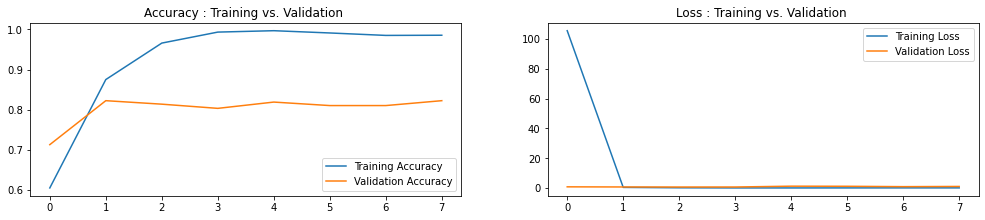

In [12]:
# Round1
epochs = 10
accuracy = hst.history['accuracy']
loss = hst.history['loss']
val_loss = hst.history['val_loss']
val_accuracy = hst.history['val_accuracy']

plt.figure(figsize=(17, 7))
plt.subplot(2, 2, 1)
plt.plot(range(epochs), accuracy, label='Training Accuracy')
plt.plot(range(epochs), val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy : Training vs. Validation ')

plt.subplot(2, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.title('Loss : Training vs. Validation ')
plt.legend(loc='upper right')
plt.show()

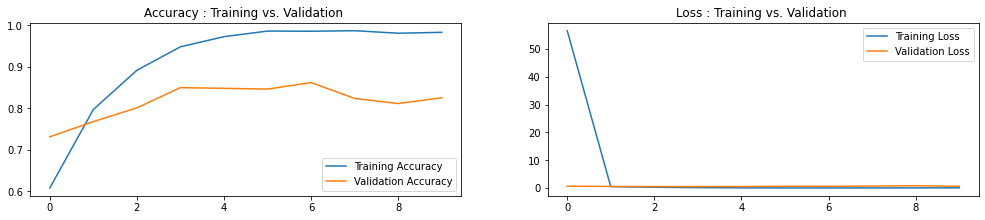

In [12]:
# round2
epochs = 10
accuracy = hst.history['accuracy']
loss = hst.history['loss']
val_loss = hst.history['val_loss']
val_accuracy = hst.history['val_accuracy']

plt.figure(figsize=(17, 7))
plt.subplot(2, 2, 1)
plt.plot(range(epochs), accuracy, label='Training Accuracy')
plt.plot(range(epochs), val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy : Training vs. Validation ')

plt.subplot(2, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.title('Loss : Training vs. Validation ')
plt.legend(loc='upper right')
plt.show()

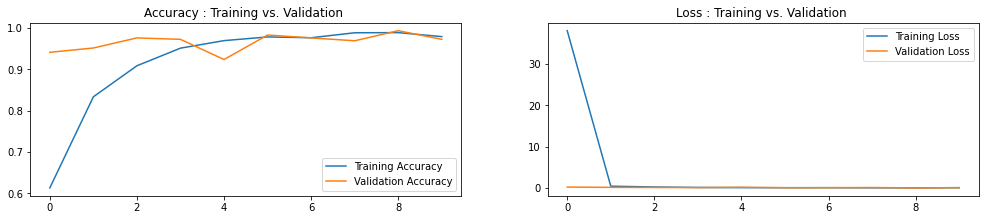

In [14]:
# round3
epochs = 10
accuracy = hst.history['accuracy']
loss = hst.history['loss']
val_loss = hst.history['val_loss']
val_accuracy = hst.history['val_accuracy']

plt.figure(figsize=(17, 7))
plt.subplot(2, 2, 1)
plt.plot(range(epochs), accuracy, label='Training Accuracy')
plt.plot(range(epochs), val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy : Training vs. Validation ')

plt.subplot(2, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.title('Loss : Training vs. Validation ')
plt.legend(loc='upper right')
plt.show()

In [19]:
model.evaluate(tf.cast(X_train, tf.float32), 
                X_label, 
               batch_size=32,
               verbose=True
              )

90/90 [==============================] - 23s 254ms/step - loss: 0.0287 - accuracy: 0.9913


[0.028693202883005142, 0.9912891983985901]

In [ ]:
T